# Intro

This is an exploratory data analysis for a small project of mine, which samples the "About us" sections of companies in the S&P 500.

My goal is to use some of the tools I learned in this course: https://www.coursera.org/learn/twitter-sentiment-analysis/home/week/1

However, unlike in that course, I don't have any label (yet) that I am trying to model. Instead, my goal is to try unsupervised learning methods such as k-means clustering. My original inspiration was to investigate the idea of different types of "company cultures" and to see if I could quantify the differentiation of different company cultures from the about us sections of company websites. My anticipation is that I will instead find differentiation into different industries based on the words found.

Link to a source on k-means clustering: https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means/tutorial

Some possible future expansions:
* Add more features to the data
 * Which Industries the companies are in
 * Company size (number of employees)
 * Company evalution

A cleaner source of data for the "about us" information could be the companies "About us" section in their LinkedIn profile. Accessing this would require manually downloading 500 sites, accessing the LinkedIn API, or using a more advanced web browser tool 




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/companyaboutus/CompanyCultures.tsv


In [2]:
about_data = pd.read_table('../input/companyaboutus/CompanyCultures.tsv')

In [3]:
# Note: the first version of the table doesn't have labels
# this may be fixed in a later version of the data
about_data = about_data.set_axis(['Symbol', 'Name', 'Website', 'AboutUs'], axis=1, copy=False)

In [4]:
about_data.dropna(inplace=True)
about_data.head(2)

Symbol         Name                    Website  \
0    AOS  A. O. Smith         http://aosmith.com   
1    ACN    Accenture  https://www.accenture.com   

                                             AboutUs  
0  A. O. Smith Corporation is one of the world's ...  
1  JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...

In [5]:
about_data.shape

(211, 4)

In version 1 of the data set, this set included 65 companies, out of a total of 500 S&P 500 companies. After some improvements, it now has 211 companies.

The missing companies may be filled in with improvements to workflow grabbing the data from websites.

In [6]:
print(about_data.columns)

Index(['Symbol', 'Name', 'Website', 'AboutUs'], dtype='object')


In [7]:
!pip install wordcloud

In [8]:
# all text
# sentences = tweets_df['tweet'].tolist()
# sentences_as_one_string =" ".join(sentences)
all_text_list = about_data['AboutUs'].tolist()
print(type(all_text_list))
print(type(all_text_list[0]))
print(all_text_list[0])
# Some entries may have been encoded as strings
for item in all_text_list:
    #print(type (item))
    if type(item) is float:
        print(item)

all_text = " ".join(all_text_list)

<class 'list'>
<class 'str'>
A. O. Smith Corporation is one of the world's leading manufacturers of residential and commercial water heaters and boilers, offering a comprehensive  The company was founded in 1874 in Milwaukee, Wisconsin, where today the Company is headquartered. A. O. Smith employs over 12,000 individuals at operations in the United States, Canada, Mexico, China, India, the United Kingdom, the Netherlands and Turkey.     We also have sales and distribution in more than 60 countries around the world.  As a global leader, A. O. Smith and its employees pride themselves on applying innovative technology and energy-efficient solutions to products marketed worldwide. The Company's goal is to be a leading global water technology company, and our focus is     on building this platform through new product development, global expansion, strategic acquisitions and partnerships.   ©2019 A. O. Smith, All rights reserved A. O. Smith ProLine water heaters are available through local p

In [9]:
from wordcloud import WordCloud

#plt.figure(figsize=(20,20))
#plt.imshow(WordCloud().generate(sentences_as_one_string))

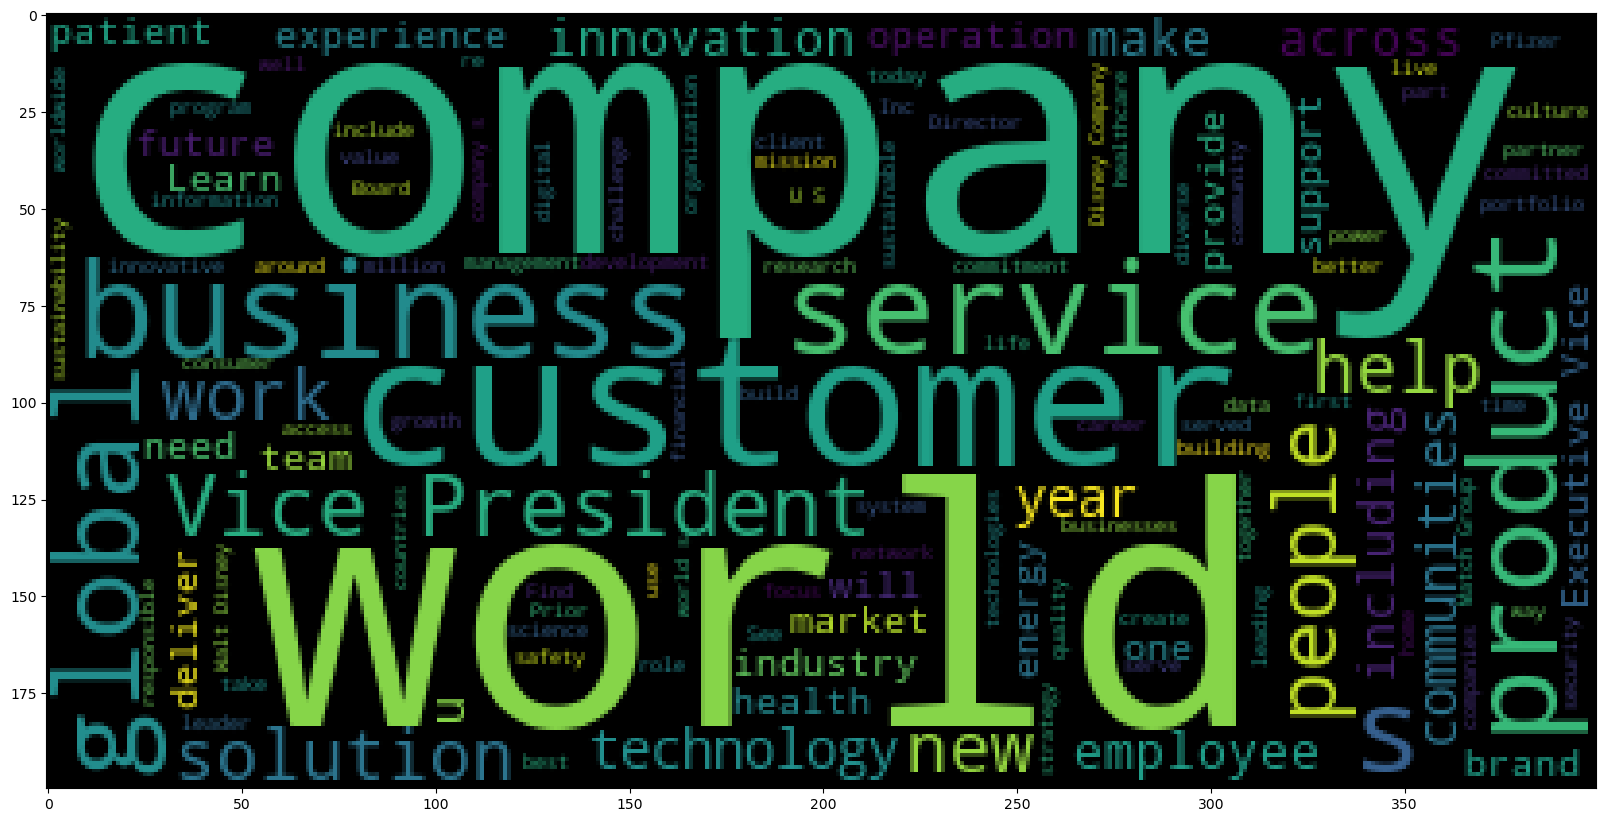

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(all_text))

# Clean up the text with String and StopWords
## String

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
# Test = '$I love AI & Machine learning!!'
#Test_punc_removed = [char for char in Test if char not in string.punctuation]
#Test_punc_removed_join = ''.join(Test_punc_removed)
#Test_punc_removed_join

In [13]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
#stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Pipeline for cleaning punctuation and stop words
def text_cleaning(text):
    Text_punc_removed = [char for char in text if char not in string.punctuation]
    Text_punc_removed_string = ''.join(Text_punc_removed)
    Text_clean = [word for word in Text_punc_removed_string.split() if word.lower() not in stopwords.words('english')]
    return Text_clean


about_data['AboutUsCleaned'] = about_data['AboutUs'].apply(text_cleaning)
about_data['AboutUsCleaned'].head(5)

0    [Smith, Corporation, one, worlds, leading, man...
1    [JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...
2    [connect, engage, world, epic, entertainment, ...
3    [AES, Global, AES, Local, We’re, integrating, ...
4    [Business, owner, Aflac, Aflac, Fortune, 500, ...
Name: AboutUsCleaned, dtype: object

# Count Vectorizer
This tool takes the counts the words in the string to characterize the string as a vector in N-space where each dimension is the count of an individual word.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
#vectorizer = CountVectorizer()
vectorizer = CountVectorizer(analyzer = text_cleaning, dtype = np.uint8)
textcount_vectorizer = vectorizer.fit_transform(about_data['AboutUs'])

#X = vectorizer.fit_transform(sample_data)

In [17]:
print(vectorizer.get_feature_names_out())
print(textcount_vectorizer.shape)

['000' '00570617' '01' ... '苏州工业园区星湖街328号' '邮编215123' '邮编518057']
(211, 11412)


I had 6269 words in the vectorizer with version 1 of the data, and now 11412 in version 2.

In [18]:
X = pd.DataFrame(textcount_vectorizer.toarray())

In [19]:
X.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      1      0      0      0      0      0      0      0      0      0  ...   

   11402  11403  11404  11405  11406  11407  11408  11409  11410  11411  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 11412 columns]

# Experiment with Clustering

In [20]:
from sklearn.cluster import KMeans

In [21]:
# Choosing k = 5 clusters to start out with
# may vary this in following steps
num_clusters = 5
kmeans_5 = KMeans(n_clusters = num_clusters,n_init=10)

about_data["Cluster_5"] = kmeans_5.fit_predict(X)
about_data["Cluster_5"] = about_data["Cluster_5"].astype("category")
about_data["Cluster_5"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    3
7    0
8    0
9    0
Name: Cluster_5, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

# First tries at visualizing results

This word is "Holding"


<Axes: xlabel='Cluster_5', ylabel='Count'>

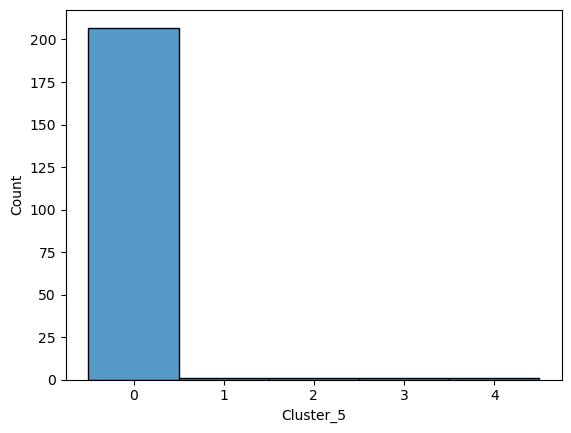

In [22]:
#Pick a random word to look at
word_index = 2400
print(f"This word is \"{vectorizer.get_feature_names_out()[word_index]}\"")
#sns.catplot(data = about_data,x="Cluster_5")
sns.histplot(data = about_data,x="Cluster_5")
#sns.catplot(data = X,x="Cluster_5",y=word_index)

Worryingly, it appears most companies are in one cluster.

In [23]:
# this step is no longer necessary
# Adding the cluster back into the data frame:
#about_data["Cluster_5"] = X['Cluster']

In [24]:
about_data.head(5)

Symbol                 Name                          Website  \
0    AOS          A. O. Smith               http://aosmith.com   
1    ACN            Accenture        https://www.accenture.com   
2   ATVI  Activision Blizzard  https://activisionblizzard.com/   
3    AES      AES Corporation                   http://aes.com   
4    AFL                Aflac                 http://aflac.com   

                                             AboutUs  \
0  A. O. Smith Corporation is one of the world's ...   
1  JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...   
2  About We connect and engage the world through ...   
3  AES Global AES Local We’re integrating innovat...   
4  Business owner?  About Aflac Aflac is a Fortun...   

                                      AboutUsCleaned Cluster_5  
0  [Smith, Corporation, one, worlds, leading, man...         0  
1  [JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...         0  
2  [connect, engage, world, epic, entertainment, ...         0  
3  [AES, Global, AES, Local, We’re, integrating, ...         0  
4  [Business, owner, Aflac, Aflac, Fortune, 500, ...         0

# Visualize Results
One nice way to see the results of this are to make new word clouds from each of the categories we have made

In [25]:
About_Cluster_5_0 = about_data[about_data['Cluster_5']==0]

In [26]:
About_Cluster_5_0.head()

Symbol                 Name                          Website  \
0    AOS          A. O. Smith               http://aosmith.com   
1    ACN            Accenture        https://www.accenture.com   
2   ATVI  Activision Blizzard  https://activisionblizzard.com/   
3    AES      AES Corporation                   http://aes.com   
4    AFL                Aflac                 http://aflac.com   

                                             AboutUs  \
0  A. O. Smith Corporation is one of the world's ...   
1  JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...   
2  About We connect and engage the world through ...   
3  AES Global AES Local We’re integrating innovat...   
4  Business owner?  About Aflac Aflac is a Fortun...   

                                      AboutUsCleaned Cluster_5  
0  [Smith, Corporation, one, worlds, leading, man...         0  
1  [JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...         0  
2  [connect, engage, world, epic, entertainment, ...         0  
3  [AES, Global, AES, Local, We’re, integrating, ...         0  
4  [Business, owner, Aflac, Aflac, Fortune, 500, ...         0

In [27]:
# note that the AboutUsCleaned column has a list of words, already cleaned
About_Cluster_5_0_Text_List = About_Cluster_5_0["AboutUsCleaned"].tolist()

In [28]:
# to plug this into the word cloud
About_Cluster_5_0_Text = [item for sublist in About_Cluster_5_0_Text_List for item in sublist]
#print(About_Cluster_5_0_Text)
About_Cluster_5_0_Text = " ".join(About_Cluster_5_0_Text)

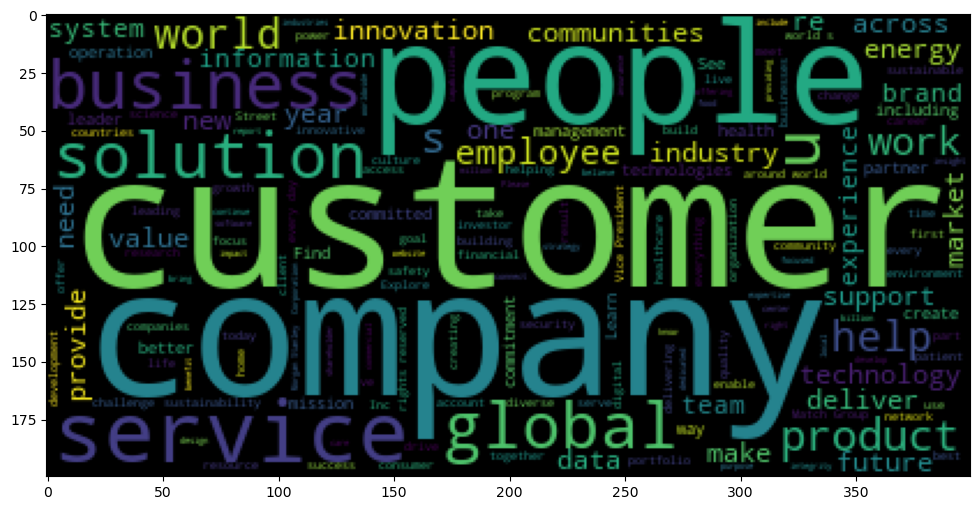

In [29]:
plt.figure(figsize=(12,6))
plt.imshow(WordCloud().generate(About_Cluster_5_0_Text))

It looks like this cluster's text is dominated by the company producing Invsigalign
Let's automate this for the k=5 clusters

Producing cloud for k=5 cluster 0
  cluster has 207 companies and string has length 368622
Producing cloud for k=5 cluster 1
  cluster has 1 companies and string has length 48107
Producing cloud for k=5 cluster 2
  cluster has 1 companies and string has length 27077
Producing cloud for k=5 cluster 3
  cluster has 1 companies and string has length 26280
Producing cloud for k=5 cluster 4
  cluster has 1 companies and string has length 34441


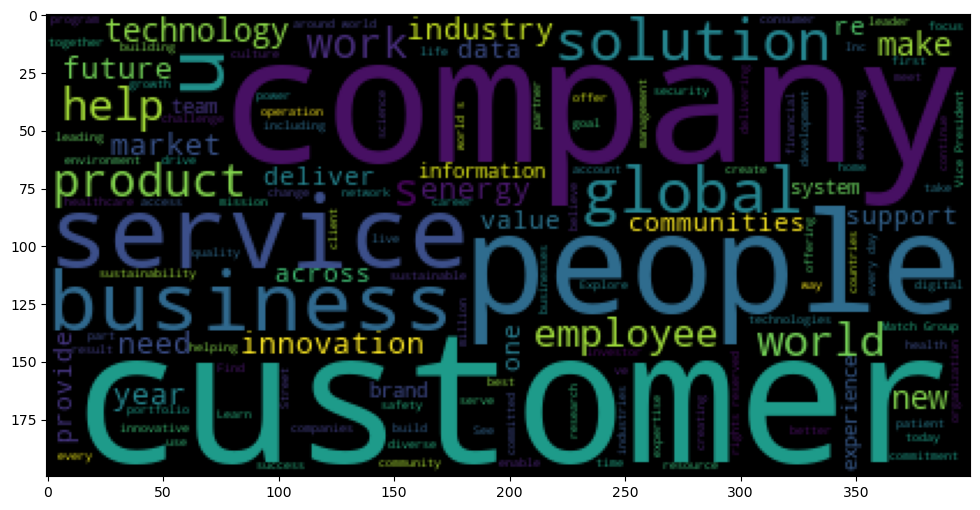

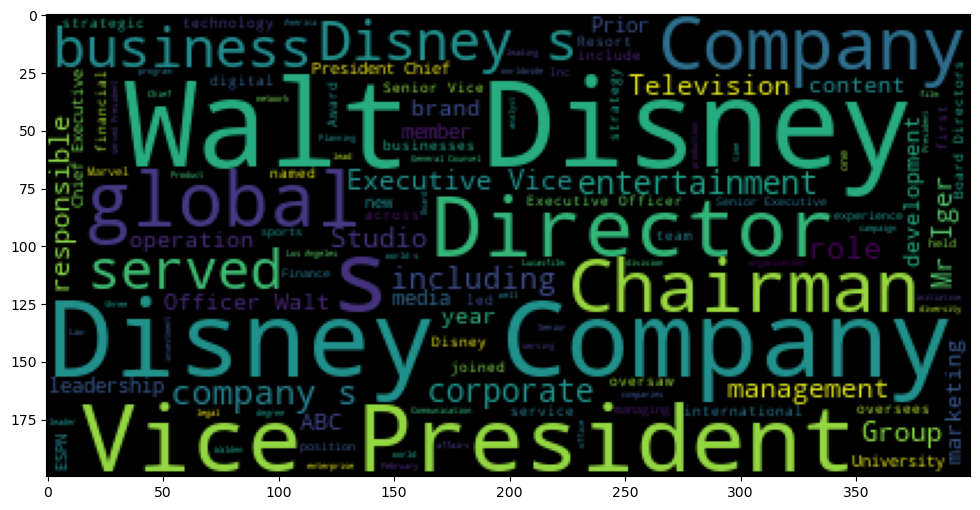

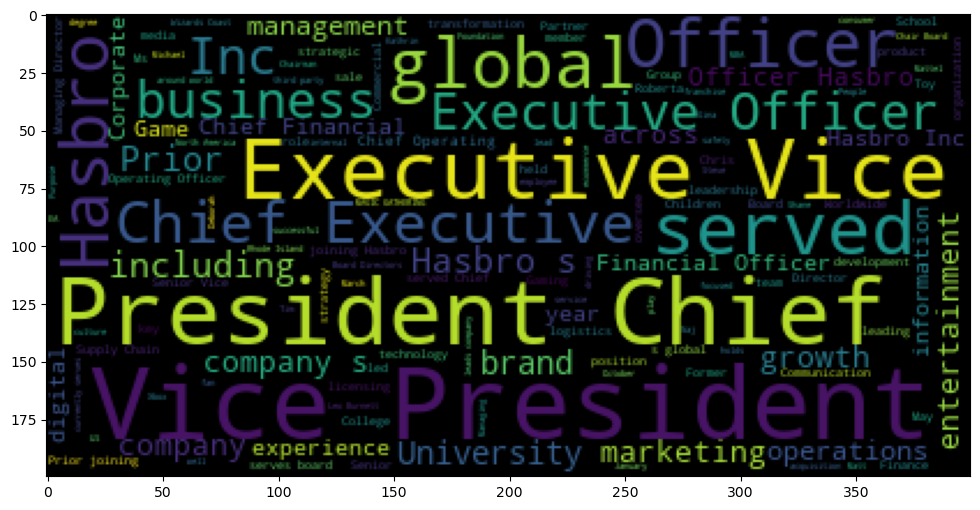

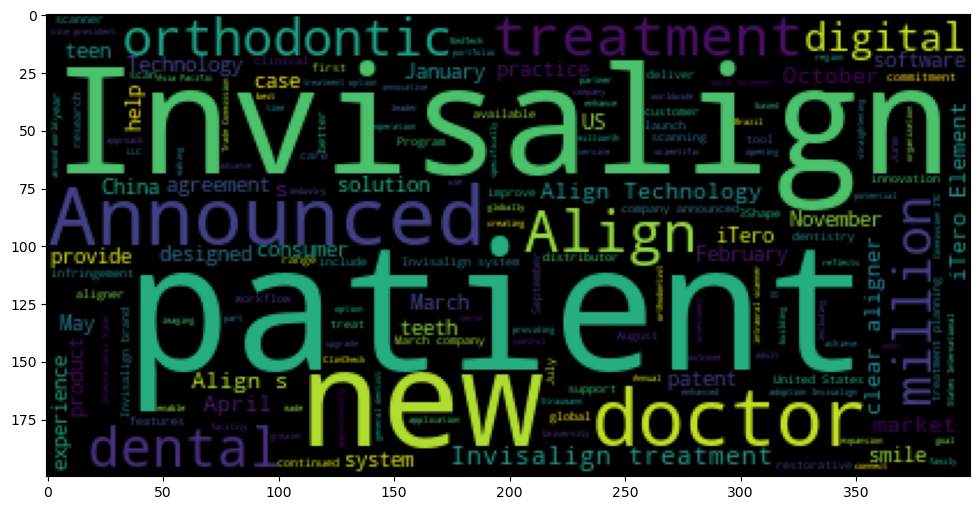

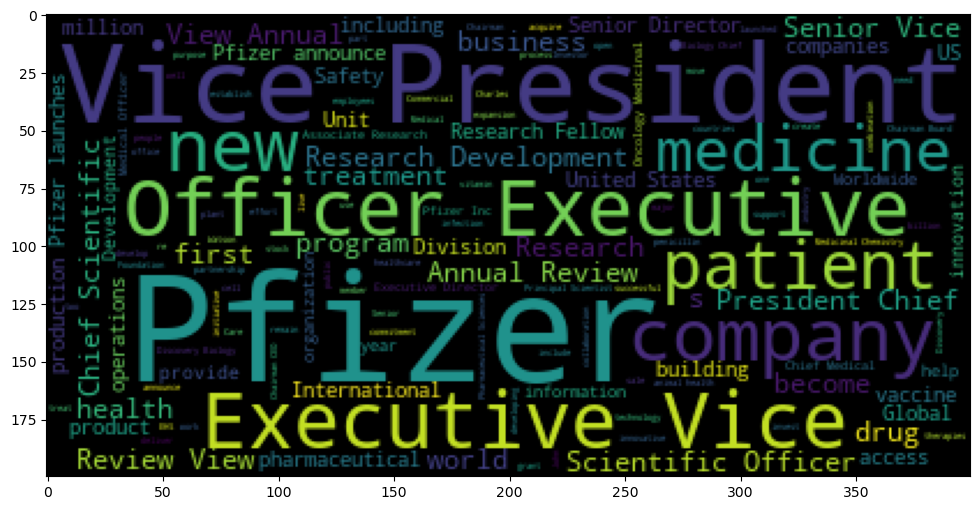

In [30]:
def PlotCloud_Cluster5(data):
    for i in range(0,5):
        print(f"Producing cloud for k=5 cluster {i}")
        About_Cluster_5_i = about_data[about_data['Cluster_5']==i]
        About_Cluster_5_i_Text_List = About_Cluster_5_i["AboutUsCleaned"].tolist()
        About_Cluster_5_i_Text = [item for sublist in About_Cluster_5_i_Text_List for item in sublist]
        About_Cluster_5_i_Text = " ".join(About_Cluster_5_i_Text)
        #plt.figure(figsize=(12,6))
        #plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        num_companies = len(About_Cluster_5_i_Text_List)
        len_str = len(About_Cluster_5_i_Text)
        print(f"  cluster has {num_companies} companies and string has length {len(About_Cluster_5_i_Text)}")
        if len_str > 0:
            plt.figure(figsize=(12,6))
            plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        else:
            print("Empty String!")
        
PlotCloud_Cluster5(about_data)

# Observations
I notice that these word clouds have many words that are clearly from specific companies (invisalign, enphase, diamondback). One issue could be that some companies keep repeating those unique words, which we are not necessarily interested in for the word cloud, for which our goal should be to understand what defines the cluster

Some ideas for addressing this:
1. flatten out the words: for each company in a cluster, remove repeats of words
2. remove words that are only present in one company

Option 1 might help balance out companies that have more about us text saved.

After some experimentation, I found that option 2 is safer for when one category has very few companies.

Producing cloud for k=5 cluster 0
  This cluster has 207 entries
Using filter option 1
<class 'str'>
  string has length 256589
Producing cloud for k=5 cluster 1
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 15845
Producing cloud for k=5 cluster 2
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 10393
Producing cloud for k=5 cluster 3
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 10899
Producing cloud for k=5 cluster 4
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 15100


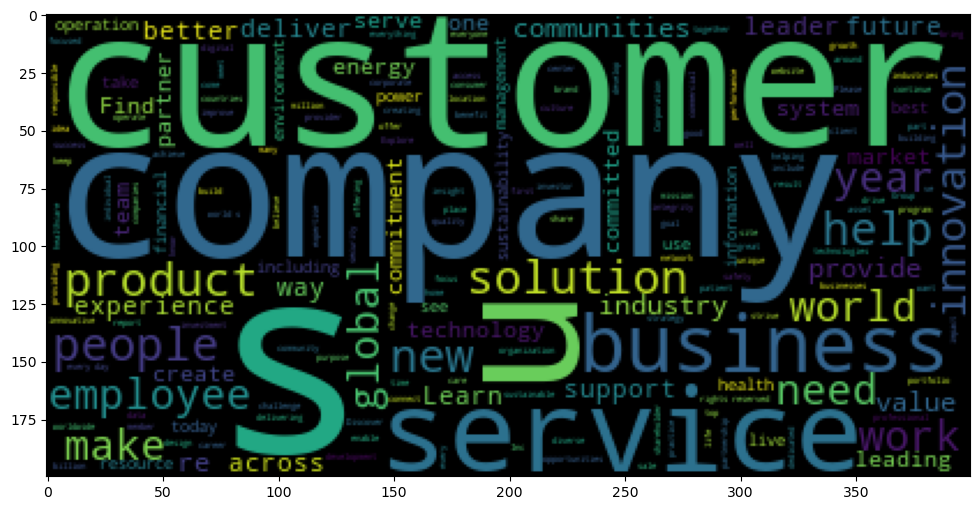

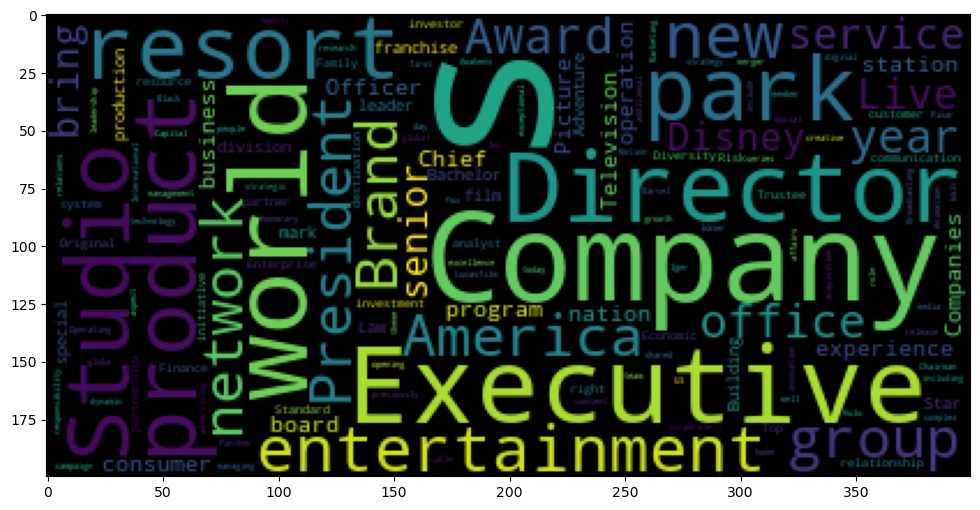

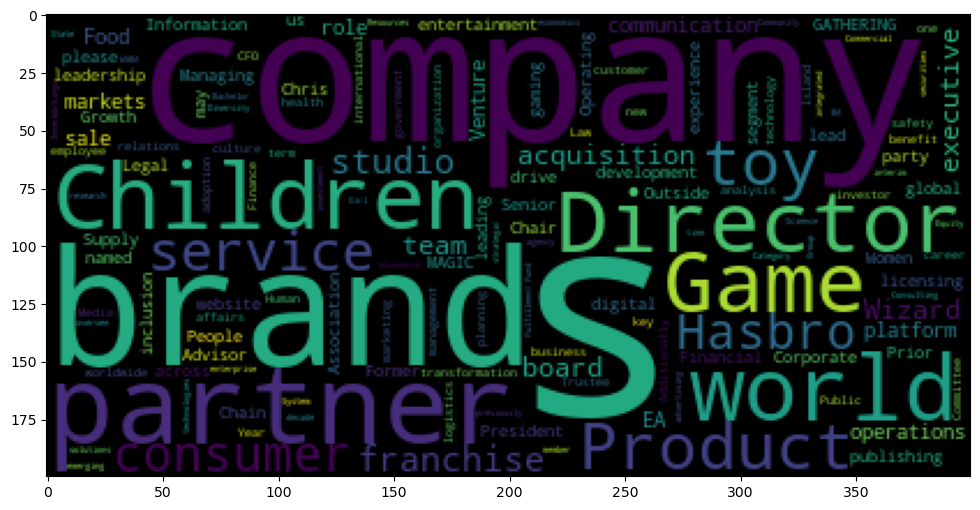

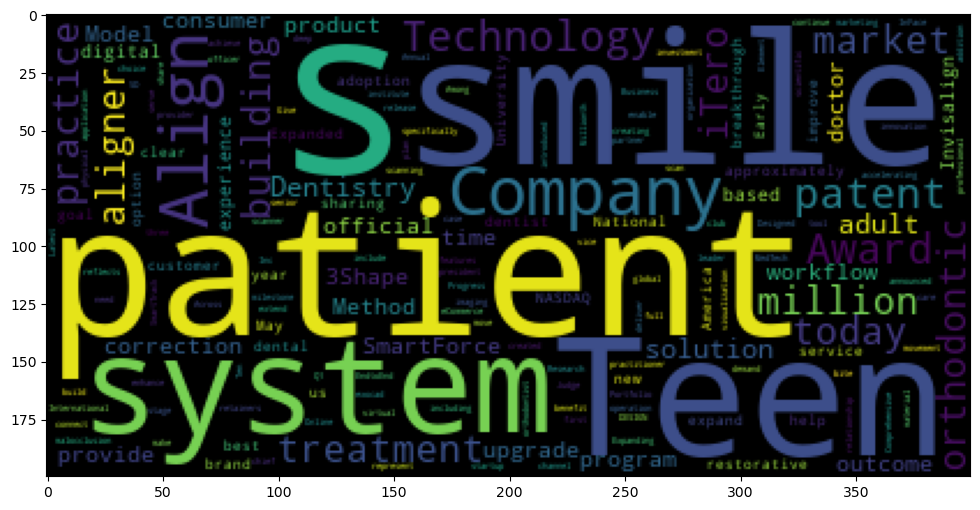

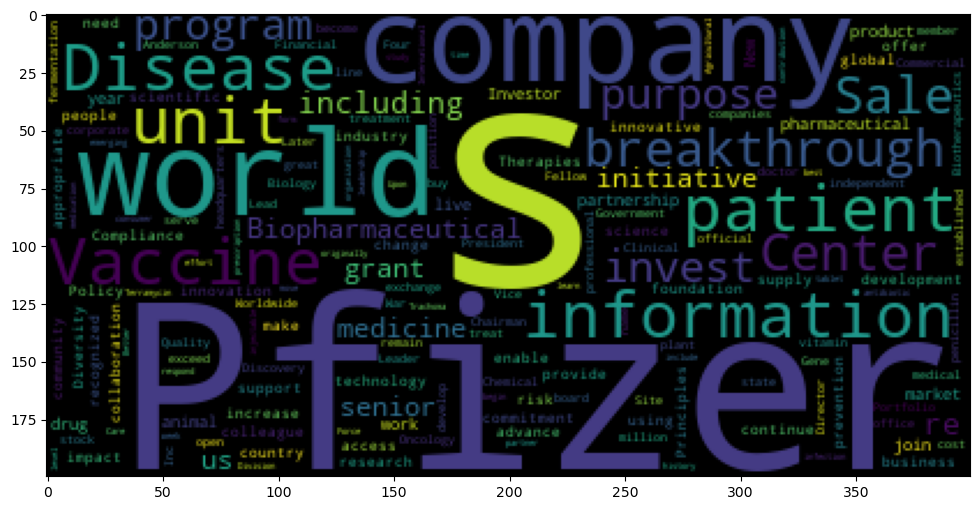

In [31]:
word_filter_option = 1

def PlotCloud_Cluster5_Improved(data):
    for i in range(0,5):
        print(f"Producing cloud for k=5 cluster {i}")
        About_Cluster_5_i = about_data[about_data['Cluster_5']==i]
        About_Cluster_5_i_Text_List = About_Cluster_5_i["AboutUsCleaned"].tolist()
        print(f"  This cluster has {len(About_Cluster_5_i_Text_List)} entries")
        About_Cluster_5_i_Text = ""
        # Option 1 remove repeats within companies
        if (word_filter_option == 1):
            print("Using filter option 1")
            for sublist in About_Cluster_5_i_Text_List:
                temp_list = [] # list for one company
                for item in sublist:
                    # avoid repeats
                    if not item in temp_list:
                        temp_list.append(item)
                for item in temp_list:
                    About_Cluster_5_i_Text += " " + item
        
        if (word_filter_option == 2):
            print("Using filter option 2")
            # Option 2 remove words unique to single companies
            n_unique = 0
            n_non_unique = 0
            for j in range(len(About_Cluster_5_i_Text_List)):
                sublist = About_Cluster_5_i_Text_List[j]
                for item in sublist:
                    item_is_unique=True
                    for k in range(len(About_Cluster_5_i_Text_List)):
                        if k == j: # avoid same company
                            continue
                        second_sublist = About_Cluster_5_i_Text_List[k]
                        if (item in second_sublist):
                            item_is_unique = False
                            n_non_unique += 1
                            break
                    if (not item_is_unique):
                        About_Cluster_5_i_Text += " " + item
                    else:
                        n_unique += 1
            print(f"Found {n_unique} unique words and {n_non_unique} non-unique words")

        
        print(type(About_Cluster_5_i_Text))
        len_str = len(About_Cluster_5_i_Text)
        print(f"  string has length {len(About_Cluster_5_i_Text)}")
        if len_str > 0:
            plt.figure(figsize=(12,6))
            plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        else:
            print("Empty String!")
        
        
PlotCloud_Cluster5_Improved(about_data)

# Varying the clustering

The two main things we should vary in the clustering are the initialization and the number of clusters ($k$).

We can vary n_init, which varies how many different random initializations are used. So, the results are probably not sensitive to changes in n_init around 10.


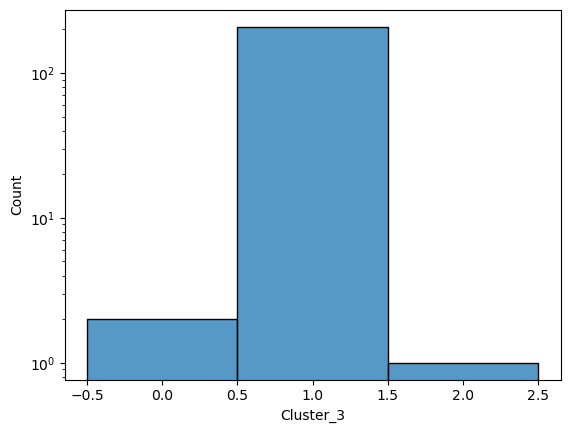

In [32]:
def ApplyClustering(main_data,vector_data,num_clusters,n_init):
    kmeans = KMeans(n_clusters = num_clusters,n_init=n_init)
    local_title = f"Cluster_{num_clusters}"
    
    main_data[local_title] = kmeans.fit_predict(X)
    main_data[local_title] = main_data[local_title].astype("category")
    main_data[local_title].head(10)
    
ApplyClustering(about_data,X,3,20)
#about_data.head()
ax = sns.histplot(data=about_data,x="Cluster_3")
ax.set_yscale("log")

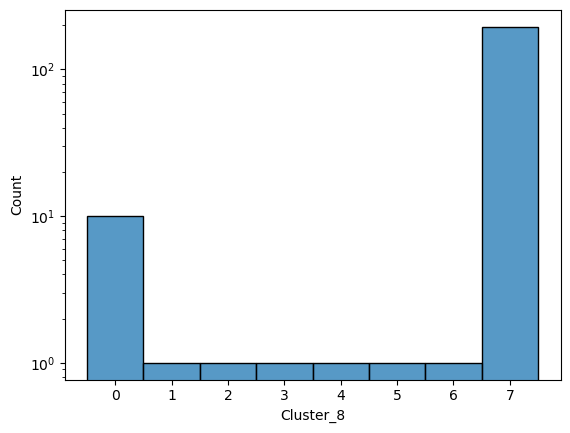

In [33]:
ApplyClustering(about_data,X,8,20)
ax = sns.histplot(data=about_data,x="Cluster_8")
ax.set_yscale("log")

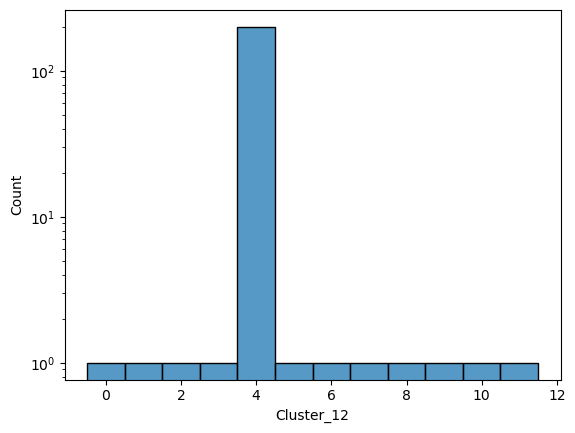

In [34]:
ApplyClustering(about_data,X,12,20)
ax = sns.histplot(data=about_data,x="Cluster_12")
ax.set_yscale("log")

Producing cloud for k=3 cluster 0
  This cluster has 2 entries
<class 'str'>
  string has length 25493
Producing cloud for k=3 cluster 1
  This cluster has 208 entries
<class 'str'>
  string has length 267488
Producing cloud for k=3 cluster 2
  This cluster has 1 entries
Skipping cluster of one company


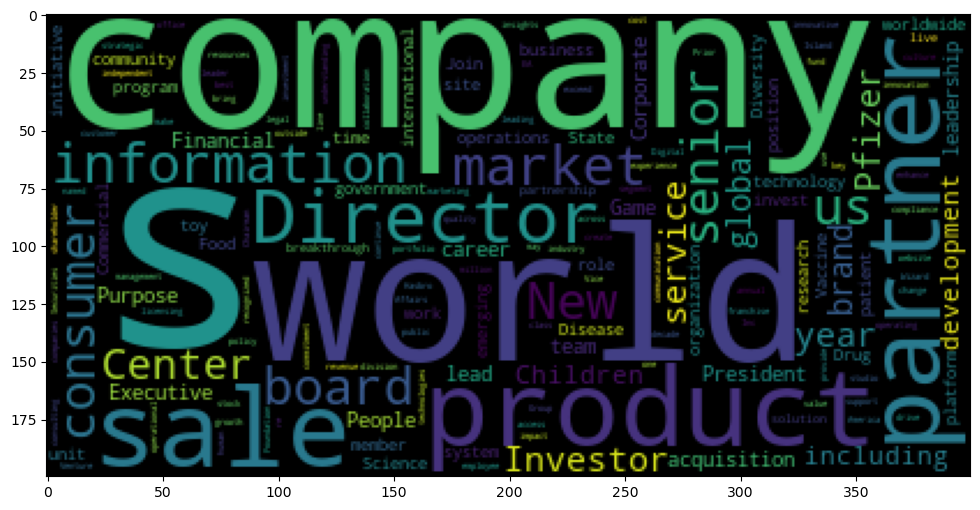

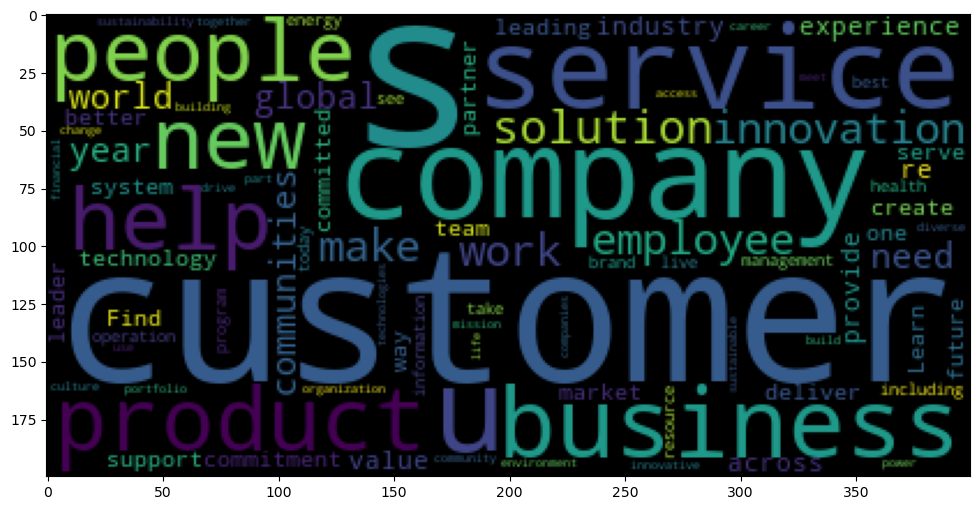

In [35]:
def PlotCloud_ClusterK(data,num_clusters):
    for i in range(0,num_clusters):
        print(f"Producing cloud for k={num_clusters} cluster {i}")
        About_Cluster_K_i = about_data[about_data[f'Cluster_{num_clusters}']==i]
        About_Cluster_K_i_Text_List = About_Cluster_K_i["AboutUsCleaned"].tolist()
        num_companies = len(About_Cluster_K_i_Text_List)
        print(f"  This cluster has {num_companies} entries")
        if num_companies == 1:
            print("Skipping cluster of one company")
            continue
        About_Cluster_K_i_Text = ""
        # Remove repeats within companies

        for sublist in About_Cluster_K_i_Text_List:
            temp_list = [] # list for one company
            for item in sublist:
                # avoid repeats
                if not item in temp_list:
                    temp_list.append(item)
            for item in temp_list:
                About_Cluster_K_i_Text += " " + item
        
        print(type(About_Cluster_K_i_Text))
        len_str = len(About_Cluster_K_i_Text)
        print(f"  string has length {len(About_Cluster_K_i_Text)}")
        if len_str > 0:
            plt.figure(figsize=(12,6))
            plt.imshow(WordCloud().generate(About_Cluster_K_i_Text))
        else:
            print("Empty String!")
        
PlotCloud_ClusterK(about_data,3)

Producing cloud for k=12 cluster 0
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 1
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 2
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 3
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 4
  This cluster has 200 entries
<class 'str'>
  string has length 239077
Producing cloud for k=12 cluster 5
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 6
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 7
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 8
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 cluster 9
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=12 clus

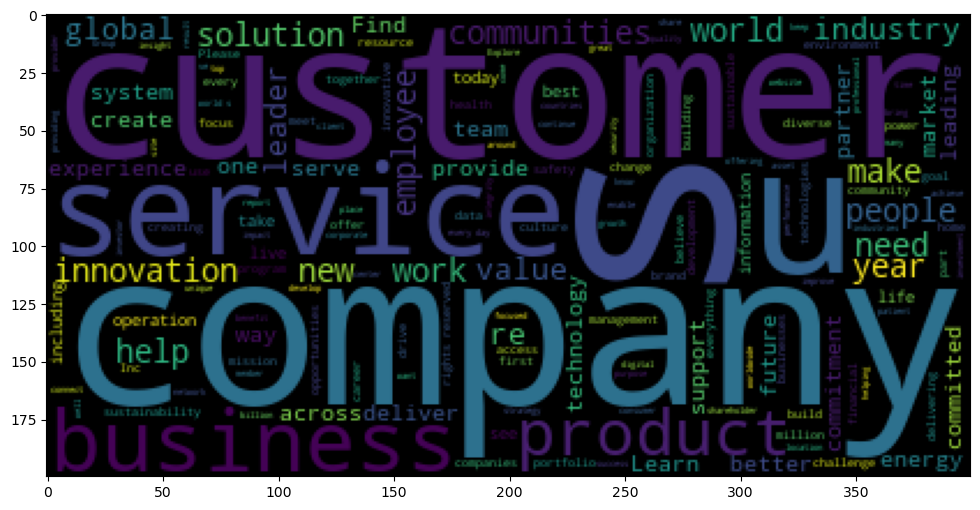

In [36]:
PlotCloud_ClusterK(about_data,12)


## Measurements
Can we measure the performance of the clustering? Some measure of the separation of the clusters?
For labeled data with a target variable to model, we would make a model using the cluster information, and evaluate that with each model.

We could look at the relative sizes of the clusters, and see how evenly they are distributed. I think something similar to the Gini coefficient or perhaps an entropy calculation would give a measurement of this.

Could entropy be a good tool to quantify the clustering? One detail to track for any measurement of the clustering is whether the variable inherently scales with the number of categories.

For the Gini coefficient, we can look at the distribution of cluster sizes (analogous to the income that Gini normally measures). For the entropy, we can treat the relative size of each cluster as a probability for that cluster.

So far, I have implemented the entropy calculation, as well as a simpler measurement of the count of clusters with more than one element.

In [37]:
about_data.head()

Symbol                 Name                          Website  \
0    AOS          A. O. Smith               http://aosmith.com   
1    ACN            Accenture        https://www.accenture.com   
2   ATVI  Activision Blizzard  https://activisionblizzard.com/   
3    AES      AES Corporation                   http://aes.com   
4    AFL                Aflac                 http://aflac.com   

                                             AboutUs  \
0  A. O. Smith Corporation is one of the world's ...   
1  JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...   
2  About We connect and engage the world through ...   
3  AES Global AES Local We’re integrating innovat...   
4  Business owner?  About Aflac Aflac is a Fortun...   

                                      AboutUsCleaned Cluster_5 Cluster_3  \
0  [Smith, Corporation, one, worlds, leading, man...         0         1   
1  [JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...         0         1   
2  [connect, engage, world, epic, entertainment, ...         0         1   
3  [AES, Global, AES, Local, We’re, integrating, ...         0         1   
4  [Business, owner, Aflac, Aflac, Fortune, 500, ...         0         1   

  Cluster_8 Cluster_12  
0         7          0  
1         7          4  
2         7          4  
3         7          4  
4         7          4

In [38]:
# return the entropy and the number of clusters with more than one entry
def ComputeColumnDistribution(data,column):
    list_col = data[column].to_list()
    hist_dict = {}
    total_count = len(list_col)
    for item in list_col:
        if item in hist_dict:
            hist_dict[item] = 1 + hist_dict[item]
        else:
            hist_dict[item] = 1
    entropy = 0
    count_of_clusters_with_multiple = 0
    for item,count in hist_dict.items():
        if count > 1:
            count_of_clusters_with_multiple += 1
        prob = float(count) / total_count
        entropy +=  - prob * np.log(prob)
    
        
    return entropy,count_of_clusters_with_multiple

entropy_3,mult_count_3 = ComputeColumnDistribution(about_data,'Cluster_3')
entropy_5,mult_count_5 = ComputeColumnDistribution(about_data,'Cluster_5')
entropy_12,mult_count_12 = ComputeColumnDistribution(about_data,'Cluster_12')

print(f"Test values for 3,5,12 are {entropy_3},{entropy_5},{entropy_12}")
print(f"Multi-entry count values for 3,5,12 are {mult_count_3},{mult_count_5},{mult_count_12}")



Test values for 3,5,12 are 0.0836391053291754,0.12023353534369019,0.32975636423622134
Multi-entry count values for 3,5,12 are 2,1,1


In [39]:
min_k = 2
max_k = 30

k_values = []
for k in range(min_k,max_k+1):
    k_values.append(k)
    ApplyClustering(about_data,X,k,30)

In [40]:
# Compute measurements
entropy_values = []
multcount_values = []
for k in range(min_k,max_k+1):

    entropy_k,mult_count = ComputeColumnDistribution(about_data,f'Cluster_{k}')
    entropy_values.append(entropy_k)
    multcount_values.append(mult_count)

print(k_values)
print(entropy_values)
print(multcount_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.07458914085105009, 0.0836391053291754, 0.11366341988814568, 0.12023353534369019, 0.1502349544682291, 0.18021336701457985, 0.7196599637230856, 0.2634393219302691, 0.2700094373858136, 0.36312804095475115, 0.5588153466738484, 0.3828383873213847, 0.5185891425265643, 0.48214410360514137, 0.5732913081743263, 0.47870688267070816, 0.5521664353938942, 0.6512008709395982, 0.6114296473315326, 0.6943252513622102, 0.6270497272652025, 1.077649065996273, 0.7827276937350798, 0.8977156551624621, 0.7886163502246089, 1.0645995378650999, 0.8042364301582787, 1.1594385827328486, 0.9062274698445878]
[2, 2, 2, 1, 1, 1, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2]


<Axes: xlabel='k', ylabel='Clustering Entropy'>

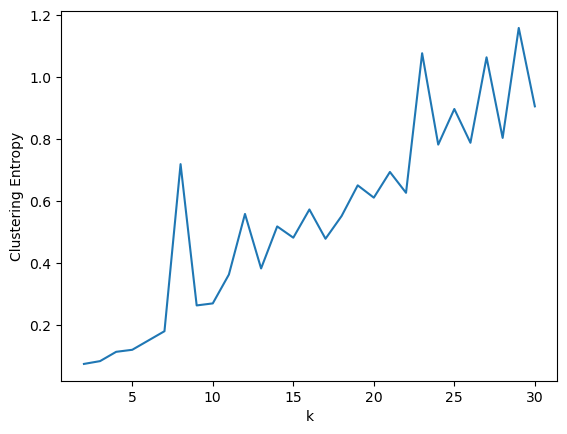

In [41]:
entropy_df = pd.DataFrame(zip(k_values,entropy_values),columns=['k','Clustering Entropy'])


#entropy_df = pd.DataFrame(columns=[k_values,entropy_values])
#entropy_df = entropy_df.transpose()
#entropy_df = entropy_df.set_axis(['k','Clustering Entropy'],axis=1,copy=False)
#about_data = about_data.set_axis(['Symbol', 'Name', 'Website', 'AboutUs'], axis=1, copy=False)
#entropy_df
sns.lineplot(data=entropy_df,x='k',y='Clustering Entropy')

I would appreciate adding some additional checks by varying n_init to get systematic uncertainties on these points. Otherwise it seems possible that these are meaningless fluctuations. 

The minimum clustering entropy seems to increase linearly with the number of categories. This might be easy to understand if it is just a matter of most $k$ values giving clusterings where almost all companies are in one cluster.



Recall the definition of entropy:

$$
H = \sum_x - p(x) \log(p(x))
$$

Suppose $x=1$ is the only cluster with more than one entry. Then, for $k$ clusters and $N$ entries $p(x=1) = \frac{N-(k-1)}{N}$ and $p(x) = \frac{1}{N}$ for $x\neq 1$

Then $H = -p(x=1)\log(p(x=1)) + \sum_{x\neq 1} -p(x) \log(p(x))$

There are $k-1$ clusters with $x\neq 1$

$H = - \frac{N-(k-1)}{N} \log (\frac{N-(k-1)}{N}) - (k-1)\frac{1}{N}\log(\frac{1}{N})$

$H = - \frac{1}{N} \left\{ (N-(k-1))\left[\log(N-(k-1)) - \log(N)\right] + (k-1) [-\log(N)] \right\}$

$H = - \frac{1}{N} \left\{ (N-(k-1))\log(N-(k-1)) - (N-(k-1))\log(N) - (k-1)\log(N) \right\}$

$H = - \frac{1}{N} \left\{ (N-(k-1))\log(N-(k-1)) - N\log(N) \right\}$

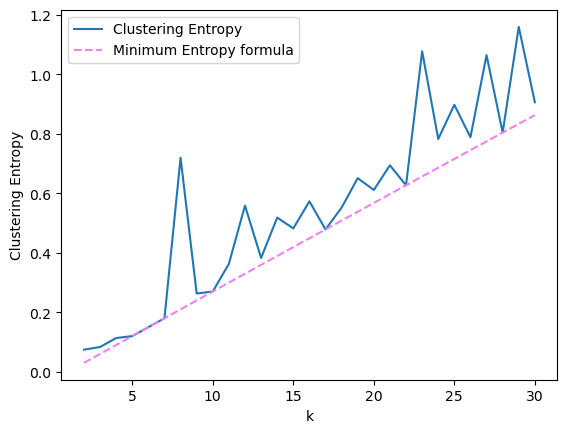

In [42]:
# Plotting this for comparison

ax = sns.lineplot(data=entropy_df,x='k',y='Clustering Entropy',label='Clustering Entropy')

N_total = 211.0

# $H = - \frac{N-(k-1)}{N} \log (\frac{N-(k-1)}{N}) - (k-1)\frac{1}{N}\log(\frac{1}{N})$
def f_exact(x):
    result = -((N_total - (x-1))/N_total) * np.log((N_total - (x - 1))/N_total)
    result += -((x-1)/N_total) * np.log(1/N_total)
    return result

x = np.linspace(min_k, max_k, 50)

plt.plot(x, f_exact(x), color='violet',linestyle='dashed',label='Minimum Entropy formula')

plt.legend()
plt.savefig('entropy_comparison.png')


This clears up the measurement a bit. We can define an adjusted entropy that does not have this trivial $k$-dependence. This can be done by subtracting or dividing by the minimum entropy formula. Which of these choices is better? My intuition would be to divide, assuming that the scale of 'noise' will also scale with the minimum entropy. This may be better justified by computing the maximum entropy, for which the size of each cluster is equal.

What is meant by 'noise'? Here, the signal is defined as the measurement of a true clustering

An interesting question: are these low entropy results common for 'bad' clustering? Is the feature of almost all entries ending up in one cluster relatively unique to this data set and analysis method?

For $N$ items in $k$ clusters, this means that $p(x) = \frac{N/k}{N} = \frac{1}{k}$. Then:

$$
H = -\sum_x \frac{1}{k} \log\left(\frac{1}{k}\right)
$$

$$
H = k \frac{1}{k} \log\left(k\right) = \log(k)
$$

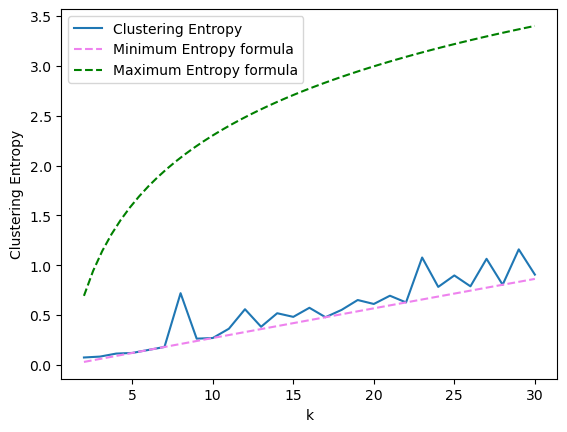

In [43]:
# Plotting this for comparison

ax = sns.lineplot(data=entropy_df,x='k',y='Clustering Entropy',label='Clustering Entropy')

#N_total = 211.0

# $H = - \frac{N-(k-1)}{N} \log (\frac{N-(k-1)}{N}) - (k-1)\frac{1}{N}\log(\frac{1}{N})$
def f_max_exact(x):
    return np.log(x)

x = np.linspace(min_k, max_k, 50)

plt.plot(x, f_exact(x), color='violet',linestyle='dashed',label='Minimum Entropy formula')
plt.plot(x, f_max_exact(x), color='green',linestyle='dashed',label='Maximum Entropy formula')


plt.legend()
plt.savefig('entropy_comparison_with_max.png')

We define the adjusted entropy ratio based on the ratio of the measured entropy to the minium entropy. We could also define it as the fraction of the distance between the minimum and maximum entropy values.

In [44]:
entropy_df['Min_Entropy'] = entropy_df['k'].apply(f_exact)
entropy_df['Max_Entropy'] = entropy_df['k'].apply(f_max_exact)

entropy_df['Scaled_Entropy_Ratio'] = (entropy_df['Clustering Entropy'] - entropy_df['Min_Entropy']) / (entropy_df['Max_Entropy'] - entropy_df['Min_Entropy'])
entropy_df

k  Clustering Entropy  Min_Entropy  Max_Entropy  Scaled_Entropy_Ratio
0    2            0.074589     0.030092     0.693147          6.710877e-02
1    3            0.083639     0.060162     1.098612          2.260771e-02
2    4            0.113663     0.090209     1.386294          1.809619e-02
3    5            0.120234     0.120234     1.609438          0.000000e+00
4    6            0.150235     0.150235     1.791759          1.690841e-17
5    7            0.180213     0.180213     1.945910          0.000000e+00
6    8            0.719660     0.210169     2.079442          2.725612e-01
7    9            0.263439     0.240101     2.197225          1.192495e-02
8   10            0.270009     0.270009     2.302585          0.000000e+00
9   11            0.363128     0.299895     2.397895          3.013982e-02
10  12            0.558815     0.329756     2.484907          1.062845e-01
11  13            0.382838     0.359594     2.564949          1.053982e-02
12  14            0.518589     0.389409     2.639057          5.742258e-02
13  15            0.482144     0.419199     2.708050          2.750086e-02
14  16            0.573291     0.448965     2.772589          5.350540e-02
15  17            0.478707     0.478707     2.833213          0.000000e+00
16  18            0.552166     0.508425     2.890372          1.836391e-02
17  19            0.651201     0.538118     2.944439          4.699416e-02
18  20            0.611430     0.567787     2.995732          1.797533e-02
19  21            0.694325     0.597431     3.044522          3.959587e-02
20  22            0.627050     0.627050     3.091042          9.011577e-17
21  23            1.077649     0.656644     3.135494          1.698389e-01
22  24            0.782728     0.686213     3.178054          3.873222e-02
23  25            0.897716     0.715757     3.218876          7.269273e-02
24  26            0.788616     0.745276     3.258097          1.724779e-02
25  27            1.064600     0.774769     3.295837          1.149634e-01
26  28            0.804236     0.804236     3.332205          2.635056e-16
27  29            1.159439     0.833678     3.367296          1.285752e-01
28  30            0.906227     0.863094     3.401197          1.699434e-02

Text(0, 0.5, 'Scaled Entropy Ratio')

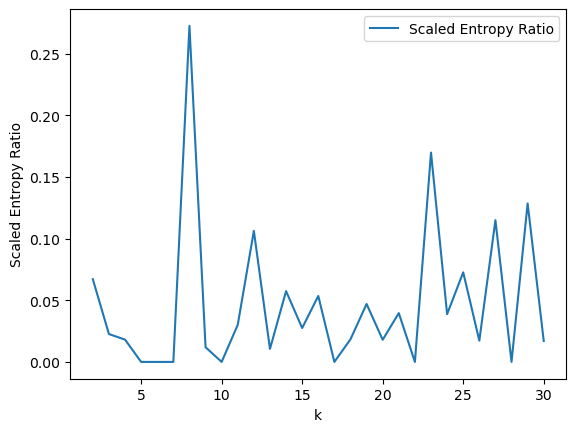

In [45]:

ax = sns.lineplot(data=entropy_df,x='k',y='Scaled_Entropy_Ratio',label='Scaled Entropy Ratio')
ax.set_ylabel('Scaled Entropy Ratio')


The maximum entropy ratio is at 17.5% for $k=23$. Does this mean that I have detected that 23 types of company exist in the 211 companies I have extracted the information from? Given the current quality of the data, I am very skeptical of this. Let's check out what information we have about the $k=23$ clusters.

Producing cloud for k=23 cluster 0
  This cluster has 38 entries
<class 'str'>
  string has length 75727
Producing cloud for k=23 cluster 1
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 2
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 3
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 4
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 5
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 6
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 7
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 8
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluster 9
  This cluster has 1 entries
Skipping cluster of one company
Producing cloud for k=23 cluste

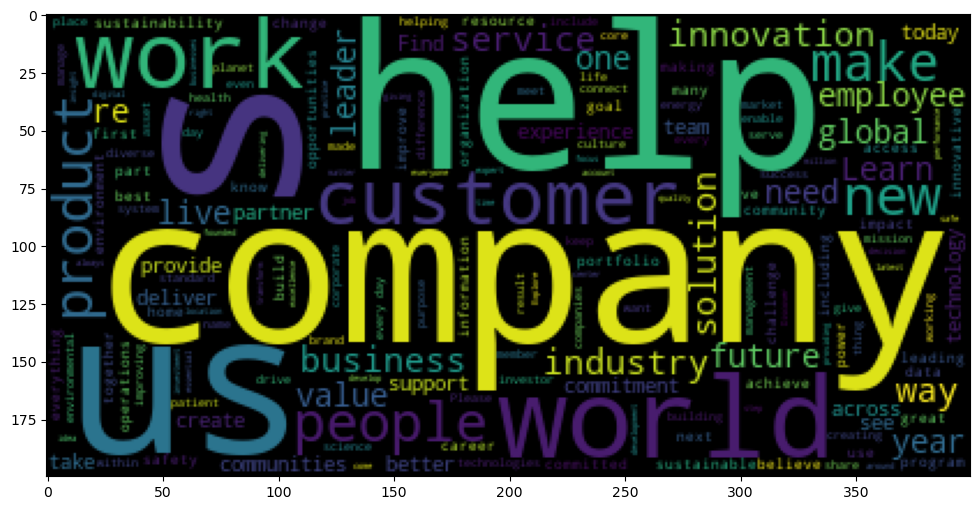

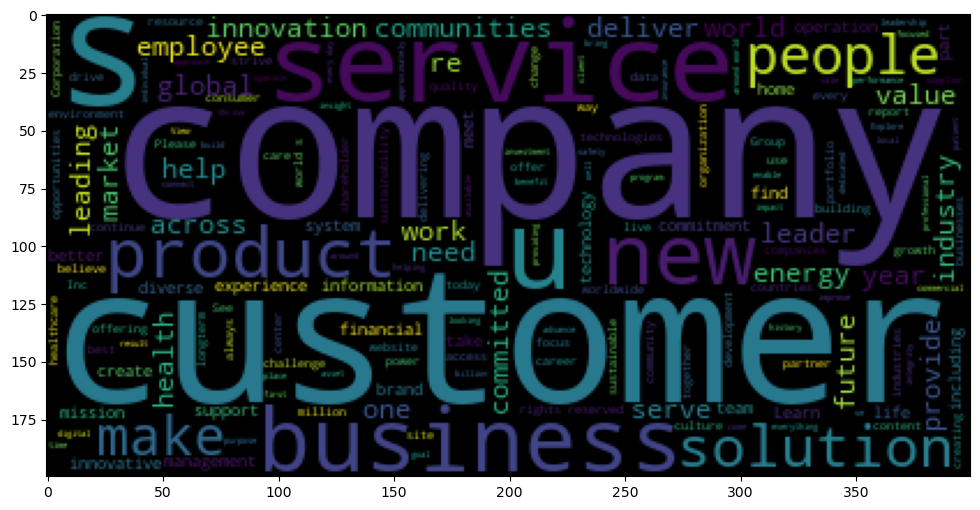

In [46]:
PlotCloud_ClusterK(about_data,23)

# Conclusions and next steps

# Improvements

Some more ideas I've had for improving this study:
* Before applying count vectorization: remove all words that appear only within one company
  * There is a lot of obvious garbage in the text that is going in
  * Also, unique trademarked names aren't interesting for this
* Add in the company industries to the data set
  * These are available in the main table in the company wikipedia pages and in the original table in https://en.wikipedia.org/wiki/List_of_S%26P_500_companies 